In [1]:
from astroML.datasets import fetch_sdss_corrected_spectra

# Download the dataset
data = fetch_sdss_corrected_spectra()

# Check the keys available in the dataset
print("Available keys in the dataset:", list(data.keys()))




Available keys in the dataset: ['norms', 'spectra', 'log_OIII_Hb', 'zerr', 'mu', 'coeffs', 'z', 'coeff1', 'lineindex_cln', 'spec_cln', 'coeff0', 'evals', 'mask', 'log_NII_Ha', 'evecs']


In [2]:
import pandas as pd
# Load the dataset
df = pd.read_csv("sdss_spectral_data.csv")

# Print the first few rows to get a quick look at the data structure
print("First few rows of the dataset:")
print(df.head())



First few rows of the dataset:
   redshift  class    flux_0    flux_1    flux_2    flux_3    flux_4  \
0  0.006325      4  0.000000  0.000000  0.000000  0.000000  0.000000   
1  0.204065      3  2.189293  2.186866  2.184458  2.182061  2.179677   
2  0.133729      3  0.000000  0.000000  0.000000  0.000000  0.000000   
3  0.084296      3  0.000000  0.000000  0.000000  0.000000  0.000000   
4  0.131529      2  0.000000  0.000000  0.000000  0.000000  0.000000   

     flux_5   flux_6    flux_7  ...   flux_990   flux_991   flux_992  \
0  0.000000  0.00000  0.000000  ...   8.393729   8.024036   8.561415   
1  1.669877  2.50816  2.002486  ...   0.000000   0.000000   0.000000   
2  0.000000  0.00000  0.000000  ...  11.021602   9.227592   9.952583   
3  0.000000  0.00000  0.000000  ...  22.398006  21.411480  21.953152   
4  0.000000  0.00000  0.000000  ...  10.656296   8.764681  10.720152   

    flux_993   flux_994   flux_995   flux_996   flux_997   flux_998   flux_999  
0   8.434849   8.59716

In [3]:
# Drop class column if it’s categorical and not useful for regression
df = df.drop(columns=['class'])
df.head(1)

,redshift,flux_0,flux_1,flux_2,flux_3,flux_4,flux_5,flux_6,flux_7,flux_8,...,flux_990,flux_991,flux_992,flux_993,flux_994,flux_995,flux_996,flux_997,flux_998,flux_999
0,0.006325,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.393729,8.024036,8.561415,8.434849,8.597162,8.344885,8.907126,7.50933,7.970523,7.984391


In [4]:
# Define function to detect outliers using IQR
def detect_outliers_iqr(df):
    outliers = {}
    for col in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers

# Detect outliers in the dataset
outliers = detect_outliers_iqr(df)
print(f"Columns with outliers:\n{[col for col, out in outliers.items() if not out.empty]}")


Columns with outliers:
['redshift', 'flux_0', 'flux_1', 'flux_2', 'flux_3', 'flux_4', 'flux_5', 'flux_6', 'flux_7', 'flux_8', 'flux_9', 'flux_10', 'flux_11', 'flux_12', 'flux_13', 'flux_14', 'flux_15', 'flux_16', 'flux_17', 'flux_18', 'flux_19', 'flux_20', 'flux_21', 'flux_22', 'flux_23', 'flux_24', 'flux_25', 'flux_26', 'flux_27', 'flux_28', 'flux_29', 'flux_30', 'flux_31', 'flux_32', 'flux_33', 'flux_34', 'flux_35', 'flux_36', 'flux_37', 'flux_38', 'flux_39', 'flux_40', 'flux_41', 'flux_42', 'flux_43', 'flux_44', 'flux_45', 'flux_46', 'flux_47', 'flux_48', 'flux_49', 'flux_50', 'flux_51', 'flux_52', 'flux_53', 'flux_54', 'flux_55', 'flux_56', 'flux_57', 'flux_58', 'flux_59', 'flux_60', 'flux_61', 'flux_62', 'flux_63', 'flux_64', 'flux_65', 'flux_66', 'flux_67', 'flux_68', 'flux_69', 'flux_70', 'flux_71', 'flux_72', 'flux_73', 'flux_74', 'flux_75', 'flux_76', 'flux_77', 'flux_78', 'flux_79', 'flux_80', 'flux_81', 'flux_82', 'flux_83', 'flux_84', 'flux_85', 'flux_86', 'flux_87', 'flux_

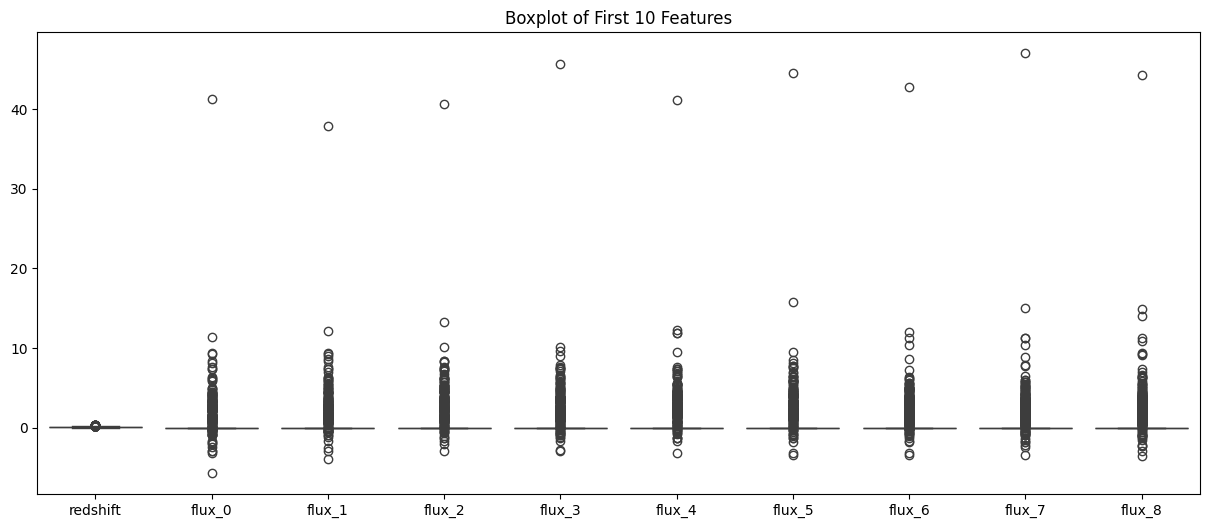

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot boxplots for a subset of the data
plt.figure(figsize=(15, 6))
sns.boxplot(data=df.iloc[:, :10])  # Adjust number of columns as needed for visibility
plt.title("Boxplot of First 10 Features")
plt.show()


In [6]:
# Cap and floor outliers
for col in df.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
print("Outliers capped.")


Outliers capped.


In [8]:
# Detect outliers in the dataset
outliers = detect_outliers_iqr(df)
print(f"Columns with outliers:\n{[col for col, out in outliers.items() if not out.empty]}")

Columns with outliers:
[]


In [9]:
df.head(1)

,redshift,flux_0,flux_1,flux_2,flux_3,flux_4,flux_5,flux_6,flux_7,flux_8,...,flux_990,flux_991,flux_992,flux_993,flux_994,flux_995,flux_996,flux_997,flux_998,flux_999
0,0.006325,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.393729,8.024036,8.561415,8.434849,8.597162,8.344885,8.907126,7.50933,7.970523,7.984391


In [11]:
df.shape

(4000, 1001)

In [10]:
import numpy as np
import pandas as pd
from astroML.fourier import FT_continuous
from sklearn.decomposition import PCA
# Fourier features calculation, ensuring even sample length
fourier_features = []

for index, row in df.iterrows():  # Replace X_resampled with your actual DataFrame
    t = np.arange(len(row[1:]))  # Assuming flux values start from index 2
    flux = row[1:].values  # Extract flux values

    # Ensure even number of samples in `flux`
    if len(flux) % 2 != 0:
        flux = flux[:-1]  # Remove last element to make it even
    t = t[:len(flux)]

    # Compute Fourier transform
    frequencies, fourier_coefficients = FT_continuous(t, flux, method=1)

    # Append the Fourier coefficients as features
    fourier_features.append(fourier_coefficients.real)  # Use .real if imaginary part is not needed

# Convert the list of Fourier features to a DataFrame
fourier_features_df = pd.DataFrame(fourier_features, columns=[f'fourier_feature_{i}' for i in range(fourier_features[0].shape[0])])

# Now you can proceed to combine this DataFrame with your original data
X_with_fourier = pd.concat([df.reset_index(drop=True), fourier_features_df], axis=1)
print("Shape of dataset after adding Fourier features:", X_with_fourier.shape)




Shape of dataset after adding Fourier features: (4000, 2001)


In [12]:
X_with_fourier.head(1)

,redshift,flux_0,flux_1,flux_2,flux_3,flux_4,flux_5,flux_6,flux_7,flux_8,...,fourier_feature_990,fourier_feature_991,fourier_feature_992,fourier_feature_993,fourier_feature_994,fourier_feature_995,fourier_feature_996,fourier_feature_997,fourier_feature_998,fourier_feature_999
0,0.006325,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-12.179796,-53.832094,1.685713,31.543285,-6.296643,-4.272801,-61.157884,33.396118,7.911534,-1.298503


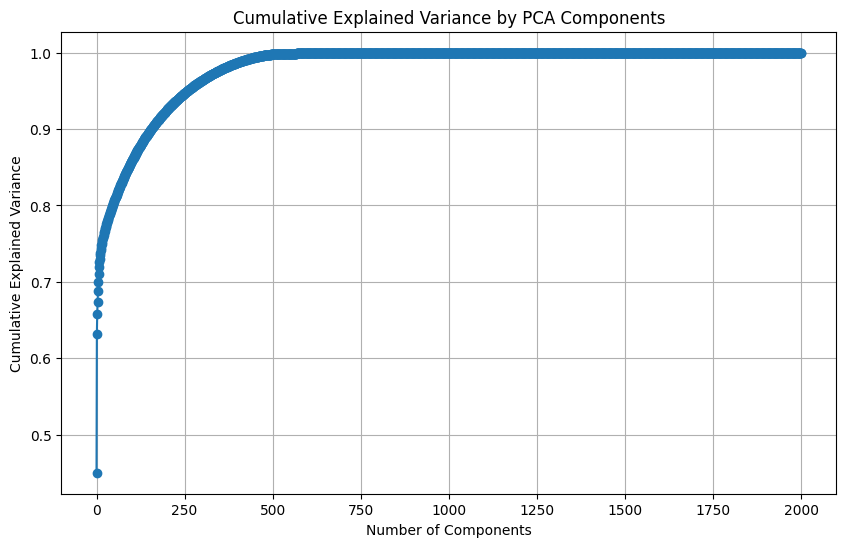

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler

# Assuming 'data_filtered' is your DataFrame after outlier removal
X = X_with_fourier.drop(columns=['redshift'])
y = X_with_fourier['redshift']



# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize PCA
pca = PCA()

# Fit PCA on the scaled data
pca.fit(X_scaled)

# Transform the data to PCA space
X_pca = pca.transform(X_scaled)

# Create a DataFrame for PCA components
pca_columns = [f'PC_{i+1}' for i in range(X_pca.shape[1])]
X_pca_df = pd.DataFrame(X_pca, columns=pca_columns)

# Combine PCA components with labels
final_dataset = pd.concat([X_pca_df, y.reset_index(drop=True)], axis=1)

# Analyze the explained variance
explained_variance = pca.explained_variance_ratio_


# Optionally, you can plot the explained variance
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance), marker='o')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

In [19]:
import pandas as pd

# Calculate the variance of each feature
variance = X.var()

# Set a threshold for minimum variance (you may adjust this value as needed)
variance_threshold = 0.001
X_filtered = X.loc[:, variance > variance_threshold]

print(f"Number of features before filtering: {X.shape[1]}")
print(f"Number of features after filtering: {X_filtered.shape[1]}")


Number of features before filtering: 2000
Number of features after filtering: 1930


In [28]:
from sklearn.decomposition import PCA

# Initialize PCA with explained variance threshold (0.95 for 95%)
pca = PCA(n_components=1930, random_state=42)

# Fit PCA to the filtered data
X_pca = pca.fit_transform(X_filtered)

# Check the number of components selected
print(f"Number of components selected to retain 95% variance: {X_pca.shape[1]}")
print("Explained variance by each component:", pca.explained_variance_ratio_)
print("Total explained variance:", sum(pca.explained_variance_ratio_))


Number of components selected to retain 95% variance: 1930
Explained variance by each component: [9.61396555e-01 1.50119699e-02 6.06006146e-03 ... 3.11282833e-35
 1.12562593e-35 2.58259382e-36]
Total explained variance: 1.0000000000000007


In [29]:
import pandas as pd

# Define column names for each principal component
pca_columns = [f'PC_{i+1}' for i in range(X_pca.shape[1])]

# Convert the PCA result into a DataFrame
X_pca_df = pd.DataFrame(X_pca, columns=pca_columns)


In [30]:
X_pca_df.shape

(4000, 1930)

In [31]:
from sklearn.model_selection import train_test_split

# Assuming X_resampled_df and y_resampled_df are already defined
X = X_pca_df  # Features
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [32]:
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (3200, 1930)
Shape of y_train: (3200,)
Shape of X_test: (800, 1930)
Shape of y_test: (800,)


In [33]:
from astroML.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


# Initialize the astroML Linear Regression model
model = LinearRegression(fit_intercept=True, regularization='none')

# Train the model
model.fit(X_train, y_train)

# Predict redshift on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {r2:.4f}")


Mean Squared Error: 0.0003
R-squared: 0.8738


In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the RandomForestRegressor with initial parameters
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust n_estimators and other parameters

# Train the model
rf_regressor.fit(X_train, y_train)

# Make predictions
y_pred = rf_regressor.predict(X_test)

# Calculate the Mean Squared Error and R-squared values
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {r2:.4f}")


Mean Squared Error: 0.0001
R-squared: 0.9377
